# Methods for compressive sensing - SVT for matrix completion 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
n1 = 1682
n2 = 943
m = 4e5

In [3]:
print(f"The undersampling factor is {m/(n1*n2)}")

The undersampling factor is 0.25218677456898125


In [4]:
M = np.random.choice(np.array([1,2,3,4,5]),size=(n1,n2))

In [5]:
# Low ranking M (r = 10)
U, sigma, V = np.linalg.svd(M, full_matrices=False)
sigma[10:] = 0
sigma = np.diag(sigma)
M = U@sigma@V

In [6]:
# Defining random samples 
Omega = np.zeros(n1*n2)
Omega[:int(m)] = 1
np.random.shuffle(Omega)
Omega = np.reshape(Omega, newshape=(n1,n2))

In [7]:
M_ = M*Omega

In [8]:
def D_tau(A, tau):
    U, sigma, V = np.linalg.svd(A, full_matrices=False)
    sigma = np.diag(sigma-tau)
    sigma = np.maximum(sigma, np.zeros_like(sigma))
    return U@sigma@V

In [9]:
def SVT(tau, M, max_iter = 200):
    delta = 1.2*M.shape[0]*M.shape[1]/np.sum(M != 0)
    Y = np.zeros(M.shape)
    P_omega = (M != 0)
    for _ in tqdm(range(max_iter)):
        delta = np.maximum(delta*0.99, 1)
        X = D_tau(Y, tau)
        Y += delta*P_omega*(M - X)
    return X

In [10]:
M_hat = SVT(1000, M_, 200)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [05:33<00:00,  1.67s/it]


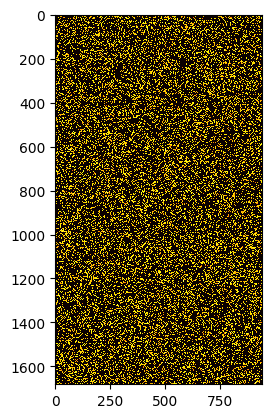

In [11]:
plt.imshow(M_, cmap='hot', interpolation='nearest')

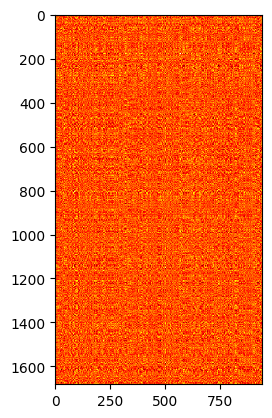

In [12]:
plt.imshow(M, cmap='hot', interpolation='nearest')

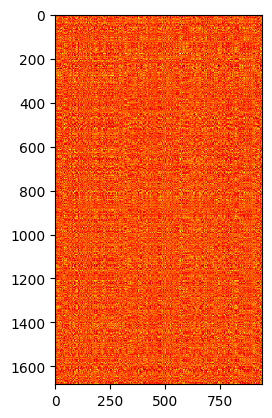

In [13]:
plt.imshow(M_hat, cmap='hot', interpolation='nearest')

In [14]:
np.linalg.norm(M - M_hat, ord='fro')

0.39682682803538705